In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to execute the original options
def execute_option_original(option, state):
    if option == 0:  # Move south
        return 0  # Move taxi south
    elif option == 1:  # Move north
        return 1  # Move taxi north
    elif option == 2:  # Move east
        return 2  # Move taxi east
    elif option == 3:  # Move west
        return 3  # Move taxi west
    elif option == 4:  # Pick up passenger
        return 4  # Pick up passenger
    elif option == 5:  # Drop off passenger
        return 5  # Drop off passenger

In [ ]:
# Function to execute the alternate options
def execute_option_alternate(option, state):
    if option == 0:  # Go to random location
        return np.random.randint(4)  # Choose a random direction to move
    elif option == 1:  # Wait for a certain number of steps
        return 4  # Action to wait for a certain number of steps
    elif option == 2:  # Explore new area
        return 5  # Action to explore a new area
    elif option == 3:  # Navigate through obstacles
        return np.random.randint(4)  # Randomly choose an action to navigate through obstacles
    elif option == 4:  # Avoid obstacles
        return 4  # Action to avoid obstacles
    elif option == 5:  # Perform a specific task
        return 5  # Action to perform a specific task

In [ ]:
# Function to choose an option using epsilon-greedy policy
def choose_option(Q, state, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(6)  # Choose a random option index from 0 to 5
    else:
        return np.argmax(Q[state])  # Choose the option index with the highest Q-value from 0 to 5

In [ ]:
# Intra-option Q-learning function
def intra_option_q_learning(env, num_episodes, alpha, gamma, epsilon, option_epsilon, execute_option_fn):
    num_options = 6
    Q = np.zeros((env.observation_space.n, num_options))  # Q-table for options

    rewards = np.zeros(num_episodes)

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while True:
            option = choose_option(Q, state, option_epsilon)
            action = execute_option_fn(option, state)
            next_state, reward, done, _ = env.step(action)

            # Update the Q-values for the chosen option
            Q[state][option] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][option])

            if done:
                break

            state = next_state
            total_reward += reward

        rewards[episode] = total_reward

    return Q, rewards

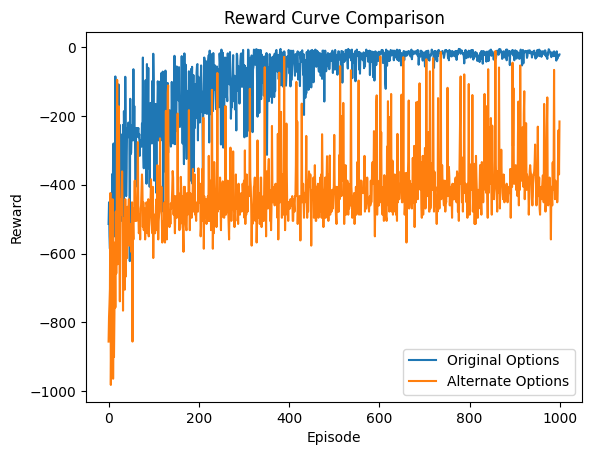

Mean reward with original options: -83.042
Mean reward with alternate options: -421.61
Original options perform better on average.


In [11]:
# Function to plot reward curve
def plot_reward_curve(rewards, label):
    plt.plot(rewards, label=label)

# Main code
env = gym.make('Taxi-v3')
num_episodes = 1000
alpha = 0.2
gamma = 0.99
epsilon = 0.1
option_epsilon = 0.1

# Run with original options
Q_original, rewards_original = intra_option_q_learning(env, num_episodes, alpha, gamma, epsilon, option_epsilon, execute_option_original)

# Run with alternate options
Q_alternate, rewards_alternate = intra_option_q_learning(env, num_episodes, alpha, gamma, epsilon, option_epsilon, execute_option_alternate)

# Plot reward curves for both algorithms
plot_reward_curve(rewards_original, label='Original Options')
plot_reward_curve(rewards_alternate, label='Alternate Options')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward Curve Comparison')
plt.legend()
plt.show()

# Compare rewards obtained in both cases
mean_reward_original = np.mean(rewards_original)
mean_reward_alternate = np.mean(rewards_alternate)

print("Mean reward with original options:", mean_reward_original)
print("Mean reward with alternate options:", mean_reward_alternate)

if mean_reward_original > mean_reward_alternate:
    print("Original options perform better on average.")
elif mean_reward_original < mean_reward_alternate:
    print("Alternate options perform better on average.")
else:
    print("Both options perform equally on average.")
